In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import pickle
import umap
import matplotlib.pyplot as plt
import seaborn as sns

import logging
logger = logging.getLogger()  # Logger

logger.setLevel("INFO")
#logging.info("Hello")

In [2]:
def write_pickle(path, obj):
    with open(path, "wb") as f:
        pickle.dump(obj, f)
        
def read_pickle(path):
    with open(path, "rb") as f:
        obj = pickle.load(f)
    return obj

In [3]:
#df_vgg = read_pickle(path="/mnt/DataRAID/melismail/Preprocessing/data/pickle_data/SVM/df_combined_vgg.pkl")
df_vgg = read_pickle(path="/mnt/DataRAID/melismail/Preprocessing/data/pickle_data/SVM/df_combined_vgg_6.pkl")

In [4]:
features = df_vgg["Features"].to_list()

In [5]:
# cluster
k = 6
clusters = KMeans(k, random_state = 42)
clusters_vgg = clusters.fit(features)

In [6]:
df_vgg["clusterid"] = clusters.labels_
df_vgg["Patient"] = [x.split("_")[0] for x in df_vgg["Img"]]
df_vgg

,Img,lbl,Features,clusterid,Patient
0,18QH2FGR4_482,non-cancer,"[0.0, 0.0, 0.1527437, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,18QH2FGR4
1,18QH2FGR4_545,Basal,"[0.0, 0.0, 0.41061747, 0.0, 0.0, 0.0, 0.198440...",1,18QH2FGR4
2,1C73PUTH4_332,Classical_CEACAM,"[0.0, 0.0, 1.4059023, 0.0, 0.0, 0.0, 0.1498133...",1,1C73PUTH4
3,1C73PUTH4_282,Classical_KRT7,"[0.0, 0.0, 0.6184426, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,1C73PUTH4
4,1C73PUTH4_236,Basal,"[0.6306652, 0.0, 0.0, 1.7511798, 0.0, 0.0, 0.8...",5,1C73PUTH4
...,...,...,...,...,...
1647,ILH0VMVF5_772,non-cancer,"[0.0, 0.0, 0.42442346, 0.0, 0.0, 0.0, 0.0, 0.0...",1,ILH0VMVF5
1648,ILH0VMVF5_290,Classical_KRT7,"[0.0, 0.0, 0.0, 1.5844721, 0.17694479, 0.0, 1....",3,ILH0VMVF5
1649,ILH0VMVF5_415,Classical_TFF1,"[0.0, 0.0, 0.0, 0.96226823, 1.0637558, 0.0, 0....",2,ILH0VMVF5
1650,ILH0VMVF5_406,non-cancer,"[0.0, 0.0, 0.0, 1.5611832, 0.8549152, 0.0, 0.0...",4,ILH0VMVF5


In [7]:
# UMAP projection of feature vectors
reducer = umap.UMAP()
df = pd.DataFrame(features)
embedding = reducer.fit_transform(df)
embedding.shape

(1652, 2)

In [8]:
df_vgg["UMAP1"] =  [embedding[i, 0] for i in range(df_vgg.shape[0])]
df_vgg["UMAP2"] =  [embedding[i, 1] for i in range(df_vgg.shape[0])]

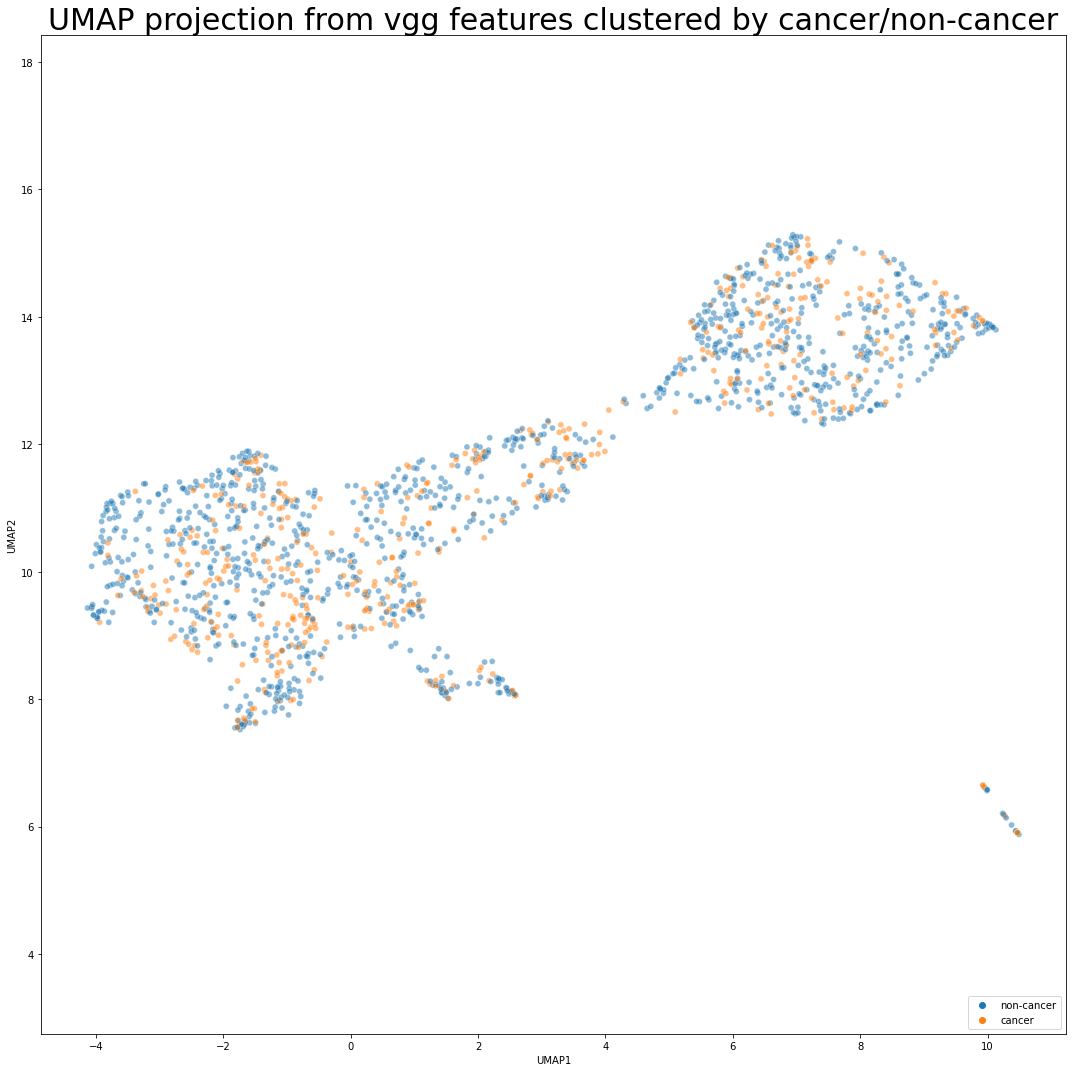

<Figure size 432x288 with 0 Axes>

In [9]:
fig = plt.figure(figsize=(15, 15))
sns.scatterplot(data=df_vgg, x="UMAP1", y="UMAP2", hue="lbl", cmap=sns.color_palette(), alpha=0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection from vgg features clustered by cancer/non-cancer', fontsize=30)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
plt.savefig('UMAP_projection_vgg_features_two_classes.png')

In [8]:
df_vgg["UMAP3"] =  [embedding[i, 0] for i in range(df_vgg.shape[0])]
df_vgg["UMAP4"] =  [embedding[i, 1] for i in range(df_vgg.shape[0])]

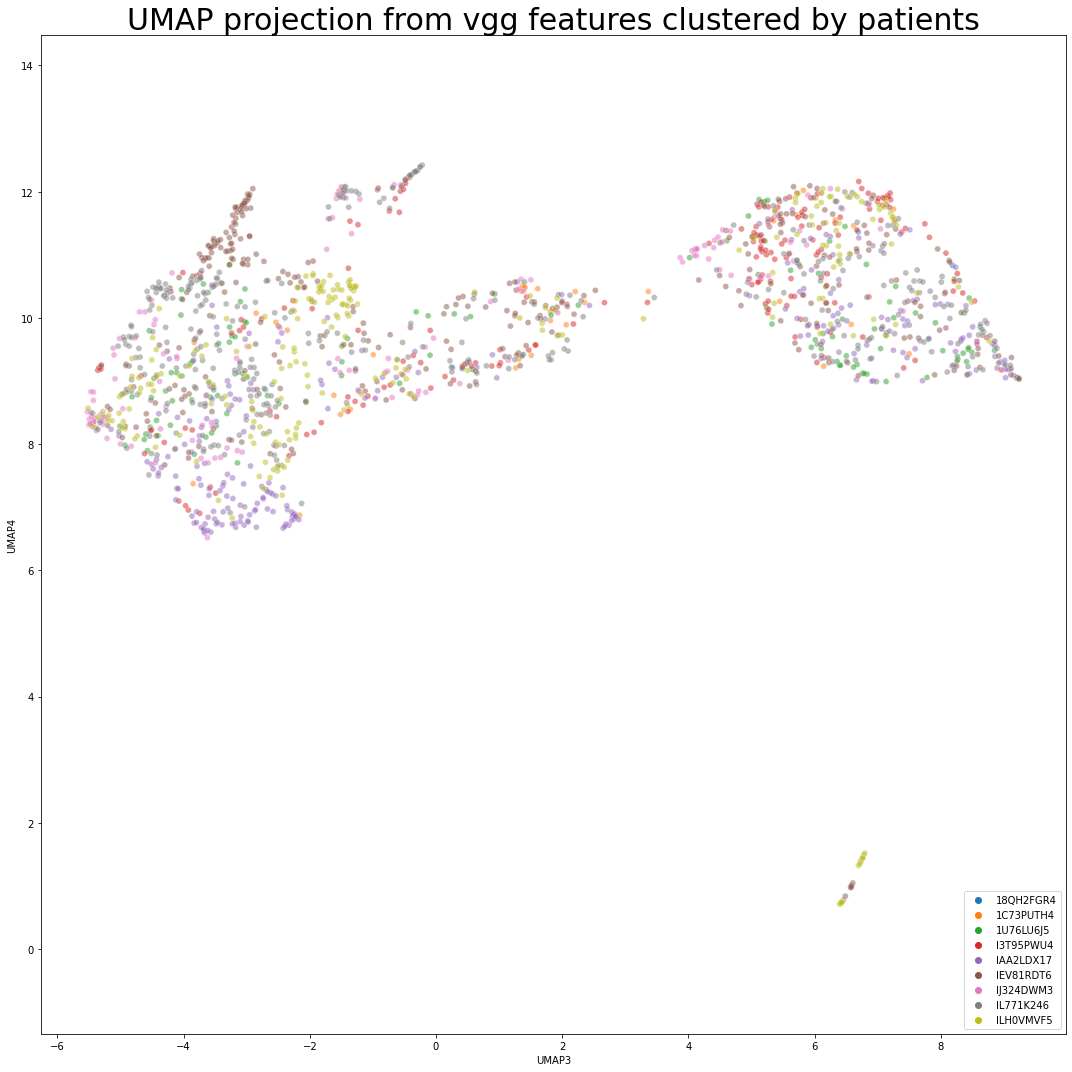

<Figure size 432x288 with 0 Axes>

In [9]:
fig = plt.figure(figsize=(15, 15))
sns.scatterplot(data=df_vgg, x="UMAP3", y="UMAP4", hue="Patient", cmap=sns.color_palette(), alpha=0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection from vgg features clustered by patients', fontsize=30)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
plt.savefig('UMAP_projection_vgg_feaftures_patients.png')

In [8]:
df_vgg["UMAP5"] =  [embedding[i, 0] for i in range(df_vgg.shape[0])]
df_vgg["UMAP6"] =  [embedding[i, 1] for i in range(df_vgg.shape[0])]

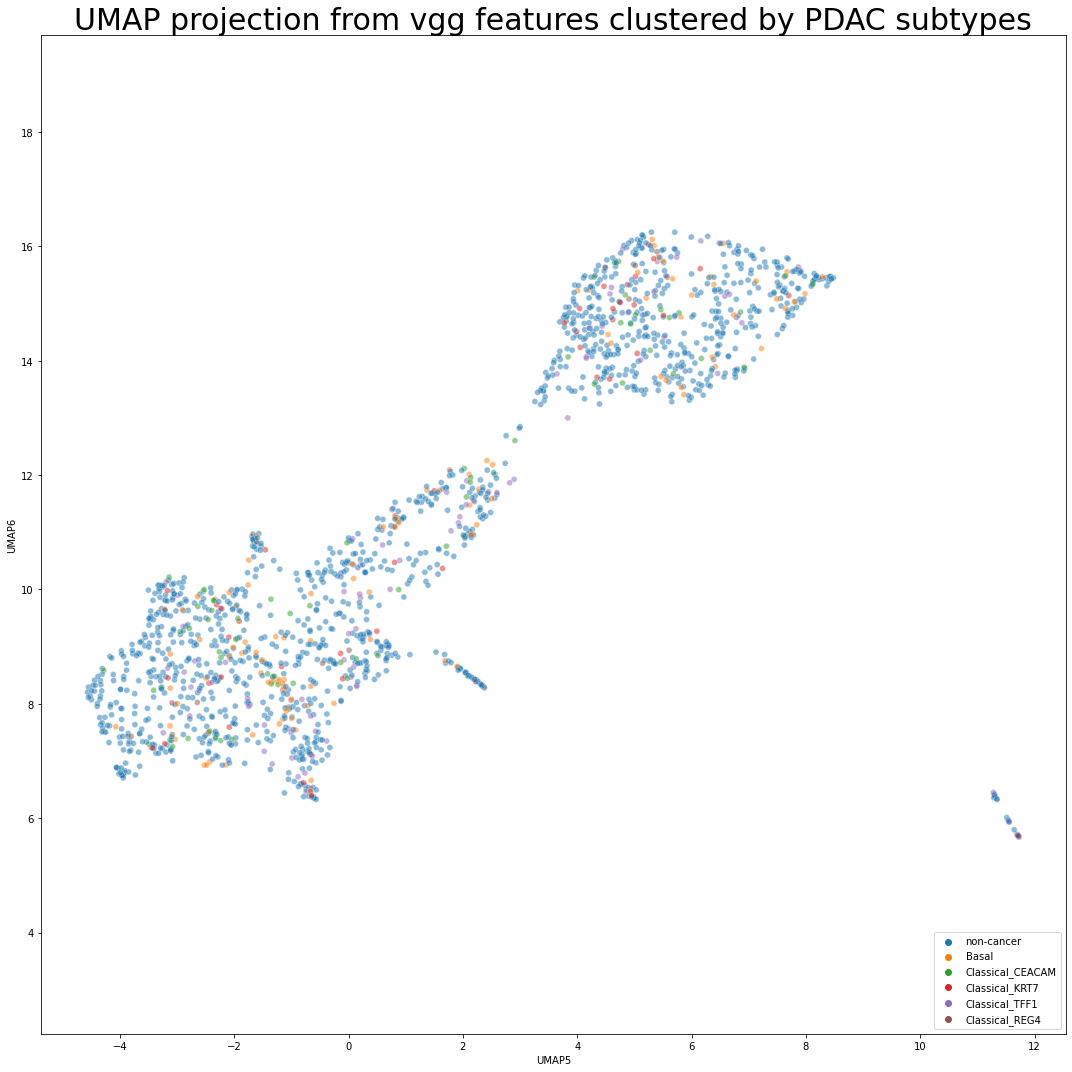

<Figure size 432x288 with 0 Axes>

In [9]:
fig = plt.figure(figsize=(15, 15))
sns.scatterplot(data=df_vgg, x="UMAP5", y="UMAP6", hue="lbl", cmap=sns.color_palette(), alpha=0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection from vgg features clustered by PDAC subtypes', fontsize=30)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
plt.savefig('UMAP_projection_vgg_feaftures_sixclasses.png')